In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Dec  8 15:23:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --upgrade transformers


     |████████████████████████████████| 1.4MB 6.0MB/s 
     |████████████████████████████████| 890kB 37.3MB/s 
     |████████████████████████████████| 2.9MB 41.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=21c24ebcd46bff634d07d687b30dfe3c66fd22b6f8f7a9a4ec48af9f060ddb9e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
pip install simpletransformers

     |████████████████████████████████| 204kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.8MB 30.4MB/s 
     |████████████████████████████████| 1.1MB 55.0MB/s 
     |████████████████████████████████| 7.4MB 66.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 317kB 51.9MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 163kB 74.9MB/s 
     |████████████████████████████████| 133kB 63.1MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 112kB 69.7MB/s 
     |████████████████████████████████| 4.5MB 65.3MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 122kB 65.2MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=b3a72c76b1ff87189403a7bf00b4cb6eb3d7025cb58239b2711abeb16be78c56
  Stored in d

In [5]:
%cd /content/drive/Shared drives/CS594 DNLP Project/

/content/drive/Shared drives/CS594 DNLP Project


In [6]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
# from datasets import load_metric

# metric = load_metric("bertscore")

In [9]:
!pip install py-rouge

     |████████████████████████████████| 61kB 3.2MB/s 


In [10]:
import logging
import pandas as pd
from sklearn.model_selection import train_test_split
from simpletransformers.seq2seq import Seq2SeqModel, Seq2SeqArgs

In [11]:
import rouge

In [12]:
# !pip install -U git+https://github.com/davebulaval/bert_score.git@master

!pip install bert_score


     |████████████████████████████████| 61kB 3.3MB/s 


In [13]:
# pip install datasets

In [14]:
import pandas as pd
import os
import numpy as np

In [15]:
from bert_score import score

### Loading Data 

In [16]:
data_path = r'/content/drive/Shared drives/CS594 DNLP Project/Data/Data 3_2'

In [17]:
train_df = pd.read_csv(os.path.join(data_path, '3_2 Training data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
train_df.head()

,input_text,target_text
0,for three weeks hamas and israel have been loc...,hamas has number of stated goals like the dest...
1,chinese court has sentenced four people to dea...,july riots between minority uyghurs and han ch...
2,although most of us worry about other climate ...,scientists and journalists are worried about t...
3,looking forward to thursday installment of wit...,events in changed the world and the way donna ...
4,alaska officials have asked the supreme court ...,alaska asked supreme court to block marriage f...


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   input_text   9993 non-null   object
 1   target_text  9993 non-null   object
dtypes: object(2)
memory usage: 234.2+ KB


In [19]:
# val_df = pd.read_csv(os.path.join(data_path, '3_2 Validation data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
# val_df.head()

In [20]:
test_df = pd.read_csv(os.path.join(data_path, '3_2 Test data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
test_df.head()

,input_text,target_text
0,in her own ann the mother of president barack ...,family and friends paint her as ardent anthrop...
1,retired union president was indicted by federa...,bonner is accused of taking payments for union...
2,fired employee of episcopal high school in ret...,authorities identify the suspected gunman as s...
3,often feel like just charge like call girls se...,in her new sheryl sandberg says women must dem...
4,divided supreme court gave big victory wednesd...,california couple wanted to contest sales tax ...


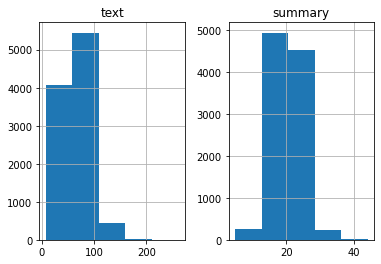

In [21]:
text_count = []
summary_count = []

for t in train_df['input_text']:
    text_count.append(len(t.split()))
for t in train_df['target_text']:
    summary_count.append(len(t.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

graph_df.hist(bins = 5)
plt.show()

In [22]:
#Check how much % of text have 0-925 words
cnt=0
for i in train_df['input_text']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(train_df['input_text']))

0.7760432302611828


In [23]:
#Check how much % of summary have 0-50 words
cnt=0
for i in train_df['target_text']:
    if(0 <= len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(train_df['target_text']))

0.1228860202141499


In [24]:
max_seq_length = 90
max_length = 25

### Building Transformers models

In [25]:
def model_transformers(epochs, train_batch_size,eval_batch_size,max_seq_length,max_length,repetition_penalty):
  model_args = Seq2SeqArgs()
  model_args.num_train_epochs = epochs
  model_args.no_save = True
  model_args.evaluate_generated_text = True
  model_args.evaluate_during_training = False
  model_args.evaluate_during_training_verbose = False
  model_args.overwrite_output_dir = True
  model_args.train_batch_size = train_batch_size
  model_args.eval_batch_size = eval_batch_size
  model_args.max_seq_length = max_seq_length
  model_args.max_length = max_length
  model_args.early_stopping = False
  model_args.do_sample = True
  model_args.repetition_penalty = repetition_penalty


  model = Seq2SeqModel(
  encoder_decoder_type='bart',
  encoder_decoder_name='facebook/bart-large-cnn',
  args=model_args,
  use_cuda=True,
  )
  return model

## Evaluation Metric

### The following code is adapted from https://pypi.org/project/py-rouge/

In [26]:
def rouge_eval(x,y):
  evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                          max_n=2,
                          limit_length=True,
                          length_limit=100,
                          length_limit_type='words',
                          apply_avg=True,
                          # apply_best=apply_best,
                          alpha=0.5, # Default F1_score
                          weight_factor=1.2,
                          stemming=True)
  scores  = evaluator.get_scores(x,y)
  return [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f'], scores['rouge-w']['f']]


In [28]:
def rouge_eval2(x,y):
  evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                          max_n=2,
                          limit_length=True,
                          length_limit=100,
                          length_limit_type='words',
                          apply_avg=True,
                          # apply_best=apply_best,
                          alpha=0.5, # Default F1_score
                          weight_factor=1.2,
                          stemming=True)
  scores  = evaluator.get_scores(x,y)
  return np.sum([scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f'], scores['rouge-w']['f']])


In [27]:
def bert_score(x,y):
  # print(x)
  # print(y)
  F1 = score(y,x, lang="en", verbose=False)[2]
  return F1

In [29]:
import torch
torch.cuda.empty_cache()

In [30]:
x = torch.tensor([3,5])
print(x.numpy().mean())
x

4.0


tensor([3, 5])

## Predicting the summaries of the test dataset

In [31]:
{'repetition_penalty': 1.12}
best_bert= 0.849546730518341

In [32]:
# print(dadafd)

In [33]:
repetition_penalty = 1.12
par_dict = {'max_length': max_length, 'max_seq_length': max_seq_length, 'repetition_penalty': repetition_penalty}
print(par_dict)

model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
model.train_model(train_df)
# eval_score = model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']
# print(eval_score)

{'max_length': 25, 'max_seq_length': 90, 'repetition_penalty': 1.12}


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(3130, 1.5353273902362148)

In [34]:
y_pred  = model.predict(test_df['input_text'])

In [35]:
y_pred[0]

'an exhibition celebrating ann life is opening in hawaii it includes personal art and artifact through fieldwork in indonesia the'

In [36]:
score(y_pred, list(test_df['target_text']), lang="en", verbose=True)[2].numpy().mean()


calculating scores...
computing bert embedding.



computing greedy matching.



done in 6.57 seconds, 151.99 sentences/sec


0.84721464

In [37]:
# y_pred[:1]

In [38]:
# list(val_df['target_text'])[:1]

In [39]:
# rouge_eval(y_pred[:2],list(val_df['target_text'])[:2])

In [40]:
rouge_eval(y_pred,list(test_df['target_text']))

[0.24144344015093655,
 0.06259239770990217,
 0.2357335939489484,
 0.11310290395381715]

In [41]:
pred_path = r'/content/drive/Shared drives/CS594 DNLP Project/Predictions/3/Test'

In [42]:
def pred_save(filename, y_pred):
  pred_df = pd.DataFrame()
  pred_df['Actual Summary'] = test_df['target_text']
  pred_df['Predicted Summary'] = y_pred
  pred_df.to_csv(os.path.join(pred_path,filename))

In [43]:
pred_save('Test predicitions 3 bertscore repp 1.12 .csv', y_pred)

In [44]:
# def objective_func_TRA(args):

#   repetition_penalty = args['repetition_penalty']

#   par_dict = {'repetition_penalty': repetition_penalty}
#   print(par_dict)

#   model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
#   model.train_model(train_df)
#   eval_score = (model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']).numpy().mean()
#   print(eval_score)

#   return -(eval_score)

# space = {'repetition_penalty': hp.uniform('repetition_penalty',1, 4)
#         }                  
                                                                 
# best_TRA = fmin(objective_func_TRA, space, algo=tpe.suggest, max_evals=4)
# print(best_TRA)

In [45]:
# def objective_func_TRA(args):

#   max_seq_length = args['max_seq_length']
#   max_length = args['max_length']
#   repetition_penalty = args['repetition_penalty']

#   par_dict = {'max_length': max_length, 'max_seq_length': max_seq_length, 'repetition_penalty': repetition_penalty}
#   print(par_dict)

#   model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
#   model.train_model(train_df)
#   eval_score = (model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']).numpy().mean()
#   print(eval_score)

#   return -(eval_score)

# space = {'max_length': hp.choice('max_length',[10,20,30]),  
#          'max_seq_length': hp.choice('max_seq_length',[20,40, 60, 80]),
#          'repetition_penalty': hp.uniform('repetition_penalty',1, 4)
#         }                  
                                                                 
# best_TRA = fmin(objective_func_TRA, space, algo=tpe.suggest, max_evals=10)
# print(best_TRA)